<a href="https://colab.research.google.com/github/adnaneaabbar/international-space-station/blob/master/iss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pytrends
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

# International Space Station Current Location

The ISS program is a joint project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada). The ownership and use of the space station is established by intergovernmental treaties and agreements.

The ISS serves as a microgravity and space environment research laboratory in which crew members conduct experiments in biology, physics, astronomy, and other fields.

# Who are the astronauts on board right now?



In [2]:
import requests
import json
r = requests.get(url='http://api.open-notify.org/astros.json')
#Storing response
with open('astros.json', 'w') as outfile:
    json.dump(r.json(), outfile)

In [3]:
#Loading response
astros_df = pd.read_json('/content/astros.json')
astros_df.head()

,message,number,people
0,success,5,"{'craft': 'ISS', 'name': 'Chris Cassidy'}"
1,success,5,"{'craft': 'ISS', 'name': 'Anatoly Ivanishin'}"
2,success,5,"{'craft': 'ISS', 'name': 'Ivan Vagner'}"
3,success,5,"{'craft': 'ISS', 'name': 'Doug Hurley'}"
4,success,5,"{'craft': 'ISS', 'name': 'Bob Behnken'}"


So there are 5 astronauts at the moment in the ISS.

# Where is the International Space Station right now ?

In [4]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
#Storing response
with open('iss-now.json', 'w') as outfile:
    json.dump(r.json(), outfile)
# Making a copy
location = r.json()

In [5]:
#Loading response
location_df = pd.read_json('/content/iss-now.json')
location_df.head()

,timestamp,iss_position,message
latitude,2020-06-29 19:04:51,20.1877,success
longitude,2020-06-29 19:04:51,98.4576,success


## Let's plot the ISS current location

In [ ]:
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy


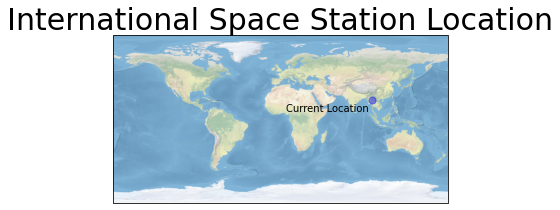

In [7]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

lon = float(location['iss_position']['longitude'])
lat = float(location['iss_position']['latitude'])

plt.scatter(lon, lat, s=50, alpha=0.4, color='blue')

plt.text(lon - 3, lat - 12, 'Current Location',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.title('International Space Station Location' , fontsize=30) 
plt.show()

In [ ]:
import datetime
date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

import time
starttime=time.time()

space_station_data = []
while True: 
    r = requests.get(url='http://api.open-notify.org/iss-now.json')
    location = r.json()
    print(location)

    space_station_data.append([ location['timestamp'],
                                location['iss_position']['latitude'],
                                location['iss_position']['longitude']
                                ])

    # dump copy to file
    tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
    tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
    
    # safety break after 10 insertions, you can change to a higher number for better visualization
    if len(space_station_data) >= 70:
        break
        
    # let it sleep 60 seconds
    time.sleep(60.0 - ((time.time() - starttime) % 60.0))

# Visualize the historical data

In [10]:
# load historical data  // change path with your file's path
iss_flight_record = pd.read_csv('/content/ISS_location_20200629190624.csv')

In [11]:
# translate timestamp into readable
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']] 

In [12]:
# add the date_time to a new column in our data frame iss_flight_record
iss_flight_record['date'] = date_time

In [13]:
# plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)
iss_flight_record.head(10)

,timestamp,latitude,longitude,date,index
0,1593457584,24.6298,102.4252,2020-06-29 19:06:24,1
1,1593457644,27.4417,105.1634,2020-06-29 19:07:24,2
2,1593457704,30.1867,108.0568,2020-06-29 19:08:24,3
3,1593457764,32.8306,111.1020,2020-06-29 19:09:24,4
4,1593457824,35.4042,114.3745,2020-06-29 19:10:24,5
5,1593457884,37.8692,117.8756,2020-06-29 19:11:24,6
6,1593457945,40.2066,121.6295,2020-06-29 19:12:25,7
7,1593458004,42.3786,125.6256,2020-06-29 19:13:24,8
8,1593458064,44.3989,129.9511,2020-06-29 19:14:24,9
9,1593458124,46.2238,134.5884,2020-06-29 19:15:24,10


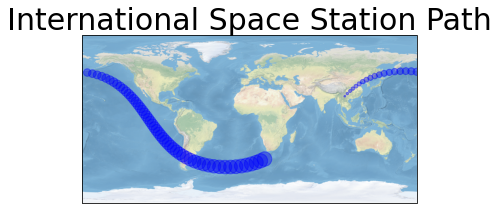

In [14]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

lon = iss_flight_record['longitude']
lat = iss_flight_record['latitude']

plt.scatter(lon, lat, s=iss_flight_record['index']*3, alpha=0.4, color='blue')

plt.title('International Space Station Path' , fontsize=30) 
plt.show()

# Model the ISS Data!

## Linear Regression

In [35]:
# each dot represents one minute let's predict where it will be in the next 10 minutes?
tmp_df = iss_flight_record.tail(20)
tmp_df

,timestamp,latitude,longitude,date,index
50,1593460584,-34.4114,-78.7179,2020-06-29 19:56:24,51
51,1593460644,-36.9130,-75.3211,2020-06-29 19:57:24,52
52,1593460704,-39.2950,-71.6835,2020-06-29 19:58:24,53
53,1593460764,-41.5203,-67.8139,2020-06-29 19:59:24,54
54,1593460824,-43.6046,-63.6261,2020-06-29 20:00:24,55
55,1593460884,-45.5046,-59.1350,2020-06-29 20:01:24,56
56,1593460945,-47.1948,-54.3317,2020-06-29 20:02:25,57
57,1593461004,-48.6373,-49.2642,2020-06-29 20:03:24,58
58,1593461064,-49.8300,-43.8670,2020-06-29 20:04:24,59
59,1593461125,-50.7350,-38.2197,2020-06-29 20:05:25,60


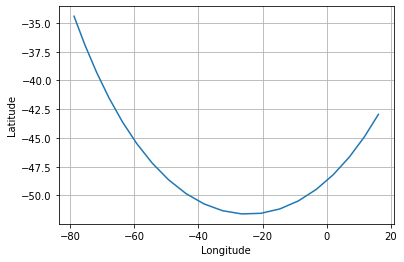

In [36]:
plt.plot(tmp_df['longitude'], tmp_df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

In [37]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)

intercept:  -49.241789674137536
slope:  -0.08767675020209542


Let's predict latitudes for longitudes.

In [38]:
predicted_latitude1 = np.ceil(slope * 20 + intercept)
print('Next predicted point:', predicted_latitude1)

Next predicted point: -50.0


In [39]:
predicted_latitude2 = np.ceil(slope * 25 + intercept)
print('Next predicted point:', predicted_latitude2)

Next predicted point: -51.0


In [40]:
predicted_latitude3 = np.ceil(slope * 30 + intercept)
print('Next predicted point:', predicted_latitude3)

Next predicted point: -51.0


In [41]:
predicted_latitude4 = np.ceil(slope * 35 + intercept)
print('Next predicted point:', predicted_latitude4)

Next predicted point: -52.0


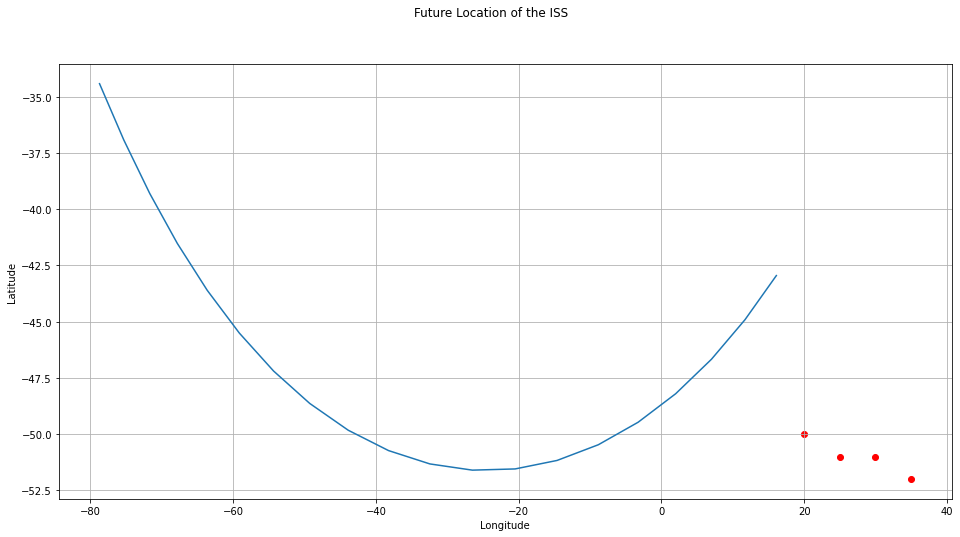

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(
    tmp_df['longitude'],
    tmp_df['latitude']
    )

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude1], color='red')
plt.scatter([25], [predicted_latitude2], color='red')
plt.scatter([30], [predicted_latitude3], color='red')
plt.scatter([35], [predicted_latitude4], color='red')

The result is nowhere near good, the trajectory of the ISS isn't a linear function of 1 variable, let's try with a polynomial regression

## Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an **nth** degree polynomial in x.

In [44]:
x = tmp_df['longitude']
y = tmp_df['latitude']

poly_regression = np.poly1d(np.polyfit(x, y, 3))

In [45]:
predicted_latitude1 = poly_regression(20)
print('Next predicted point:', predicted_latitude1)

Next predicted point: -41.73443447950672


In [46]:
predicted_latitude2 = poly_regression(25)
print('Next predicted point:', predicted_latitude2)

Next predicted point: -39.56376469424502


In [47]:
predicted_latitude3 = poly_regression(30)
print('Next predicted point:', predicted_latitude3)

Next predicted point: -37.217069225660765


In [48]:
predicted_latitude4 = poly_regression(35)
print('Next predicted point:', predicted_latitude4)

Next predicted point: -34.70363253269397


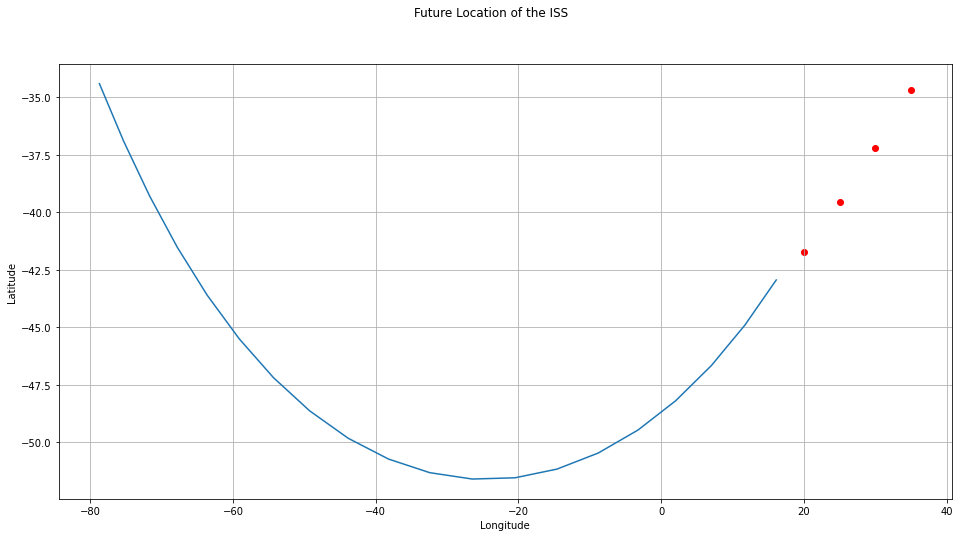

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(
    tmp_df['longitude'],
    tmp_df['latitude']
    )

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude1], color='red')
plt.scatter([25], [predicted_latitude2], color='red')
plt.scatter([30], [predicted_latitude3], color='red')
plt.scatter([35], [predicted_latitude4], color='red')

A better result than the linear regression.